## Лабораторная работа №4 по прикладной математике

### Выполнили:Васильева Екатерина

### Группа: M33011

##### Постановка задачи:

1. Постройте авторегрессионную модель временного ряда AR(3):

    $x_t = a_0 + a_1x_{t−1} + a_2x_{t−2} + a_3x_{t−3} + ε_t$ <br>

2. Проверьте, что временной ряд с коэффициентами авторегрессии $a_i$ будет стационарным <br>

3. Выберите случайнымым образом первые несколько значений временного ряда и сгенерируйте порядка 1000 значений временного ряда соответственно авторегрессионной модели стационарного временного ряда с шумом из нормального распределения (центр распределения должен находиться в нуле, дисперсию подберите самостоятельно) <br>

4. Постройте график <br>

5. Преобразуйте временной ряд к последовательности векторов задержек. Обучите машину опорных векторов для задачи регрессии на обучающей части выборки (объем обучающей выборки 80%) и определите авторегрессионные параметры <br>

6. Постройте продолжение временного ряда по найденным параметрам модели и поместите на график первого временного ряда. Сравните полученные графики.

7. Проанализируйте результаты при различных ядрах и других гиперпараметрах модели. 


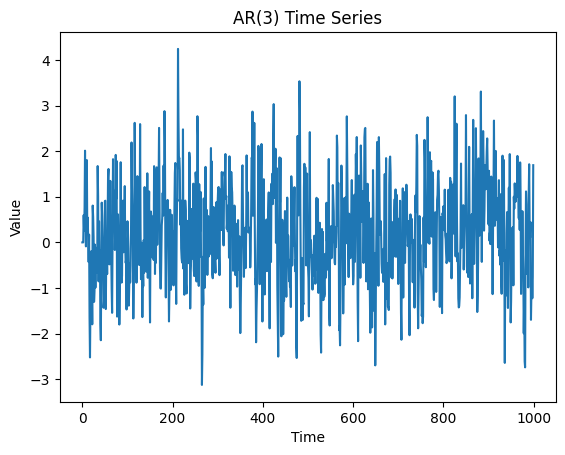

In [2]:
#Построение авторегрессионной модели третьего порядка
import numpy as np
import matplotlib.pyplot as plt

# Задаем коэффициенты модели
a0 = 0.1
a1 = 0.5
a2 = -0.2
a3 = 0.1

# Генерируем временной ряд AR(3)
np.random.seed(42)
n = 1000
x = np.zeros(n)

for t in range(3, n):
    x[t] = a0 + a1*x[t-1] + a2*x[t-2] + a3*x[t-3] + np.random.normal()

plt.plot(x)
plt.title('AR(3) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Проверка на стационарность

In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(x)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print('Ряд стационарен.')
else:
    print('Ряд нестационарен.')

ADF Statistic: -15.29555206256669
p-value: 4.383420687353587e-28
Critical Values: {'1%': -3.4369259442540416, '5%': -2.8644432969122833, '10%': -2.5683158550174094}
Ряд стационарен.


Но тест Дики-Фуллера не гарантирует 100% стационарсность, построим график автокорелляции

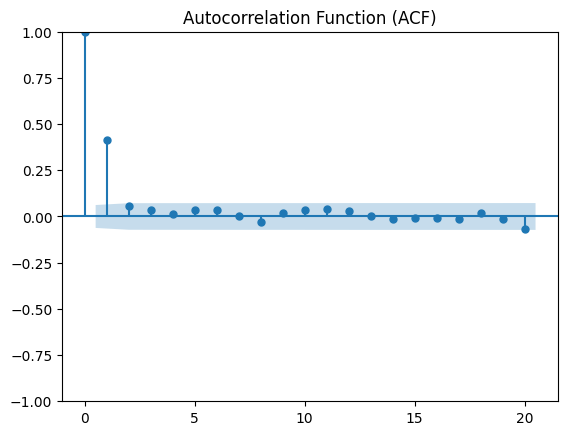

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

Для стационарных временных рядов график ACF быстро затухает после нескольких первых значений

Анализ корней характеристического уравнения <br>
Временной ряд является стационнарным тогда и только тогда, когда все корни характеристического уравнения по модулю больше 1 (т.е лежат за пределами единичной окружности) <br>
$a(z) = 1 - \sum_{i=1}^{n}{a_i\ z^i}$

In [5]:
from sympy import I, symbols, Eq, solve

# Определение переменных
a, x = symbols('a x')

# Задаем коэффициенты модели AR(3)
a0 = 0.5
a1 = 0.3
a2 = -0.2
a3 = 0.1

# Характеристическое уравнение AR(3)
char_eq = Eq(1 - a1*x - a2*x**2 - a3*x**3, 0)

# Решение характеристического уравнения
roots = solve(char_eq, x)
print('Корни характеристического уравнения:', roots)


Корни характеристического уравнения: [2.44542835430245, -0.222714177151224 - 2.00989092308944*I, -0.222714177151224 + 2.00989092308944*I]


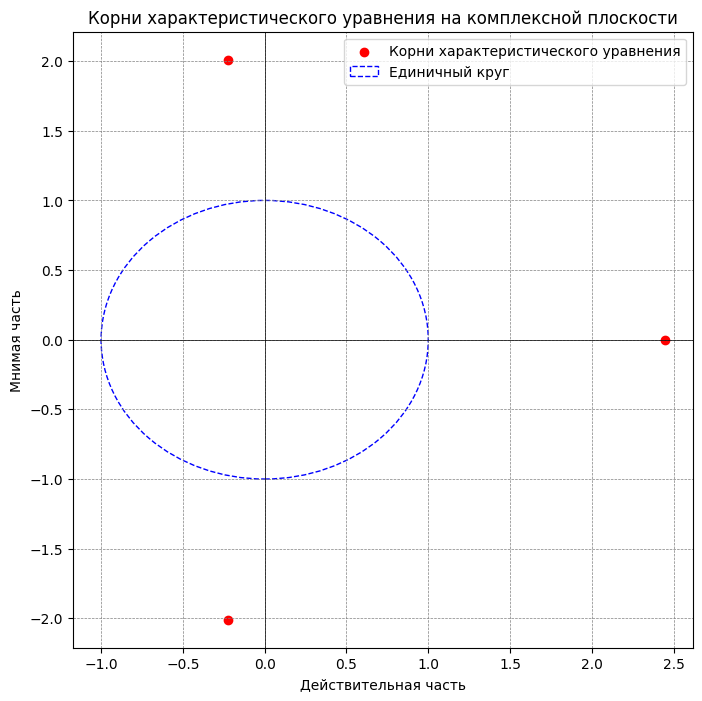

In [6]:
# Извлечение действительных и мнимых частей корней
roots_real = [float(root.as_real_imag()[0]) for root in roots]
roots_imag = [float(root.as_real_imag()[1]) for root in roots]

plt.figure(figsize=(8, 8))
plt.scatter(roots_real, roots_imag, color='red', label='Корни характеристического уравнения')

circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='dashed', label='Единичный круг')
plt.gca().add_patch(circle)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Корни характеристического уравнения на комплексной плоскости')
plt.xlabel('Действительная часть')
plt.ylabel('Мнимая часть')
plt.legend()
plt.show()

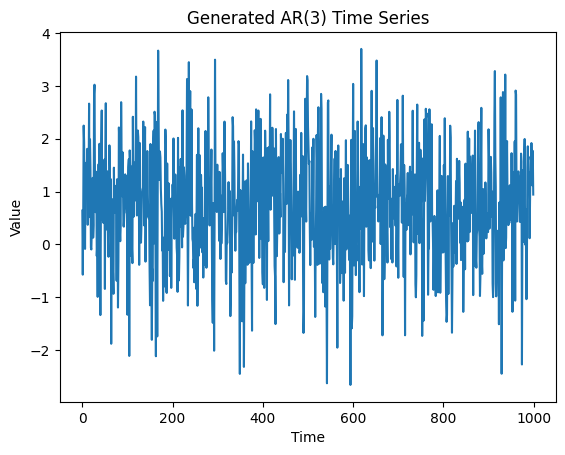

In [7]:
#Генерация данных
initial_values = np.random.normal(size=3)

generated_data = np.zeros(n)
generated_data[:3] = initial_values

for t in range(3, n):
    generated_data[t] = a0 + a1*generated_data[t-1] + a2*generated_data[t-2] + a3*generated_data[t-3] + np.random.normal()

plt.plot(generated_data)
plt.title('Generated AR(3) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Включение лагов в данные позволяет учитывать временные зависимости и паттерны во временном ряде + путем добавления лагов в данные можно анализировать, как предыдущие значения временного ряда влияют на текущие значения, т.е выявлять эти закономерности

In [8]:
def create_lagged_matrix(data, lag):
    n = len(data)
    lagged_matrix = np.zeros((n - lag, lag))

    for i in range(lag, n):
        lagged_matrix[i - lag, :] = data[i - lag:i]

    return lagged_matrix

# Задаем параметр задержки
lag = 3

# Преобразование временного ряда к последовательности векторов задержек
lagged_matrix = create_lagged_matrix(generated_data, lag)

Метод опорных векторов — это классификационный метод обучения с учителем, довольно сложный, но достаточно интуитивный на базовом уровне.
Предположим, что существует два класса данных. Метод опорных векторов находит гиперплоскость или границу между двумя классами данных, которая максимизирует разницу между двумя классами. Есть множество плоскостей, которые могут разделить два класса, но только одна из них максимизирует разницу или расстояние между классами.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(lagged_matrix, generated_data[lag:], test_size=0.2, random_state=42)

# Обучение SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)


y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
ar_coefficients = svr_model.coef_[0]
print('Авторегрессионные коэффициенты:', ar_coefficients)

Mean Squared Error: 1.2346900879279072
Авторегрессионные коэффициенты: [ 0.13472876 -0.15861774  0.21323142]


In [26]:
svr_model.coef_

array([[ 0.13472876, -0.15861774,  0.21323142]])

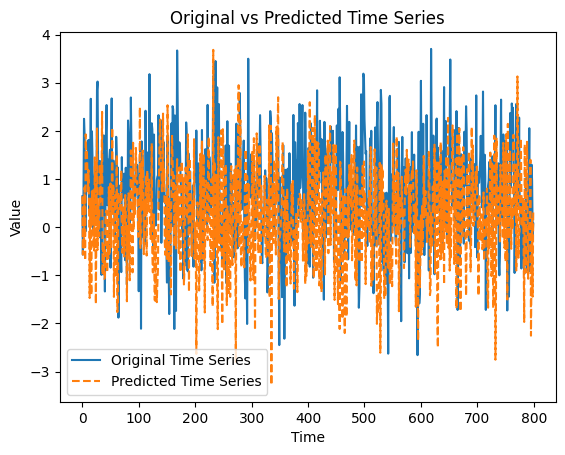

In [11]:
predicted_values = np.zeros(n)
predicted_values[:lag] = generated_data[:lag]

for t in range(lag, n):
    predicted_values[t] = ar_coefficients[0] + np.dot(ar_coefficients, predicted_values[t-lag:t][::-1]) + np.random.normal()

plt.plot(generated_data[:800], label='Original Time Series')
plt.plot(predicted_values[:800], label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

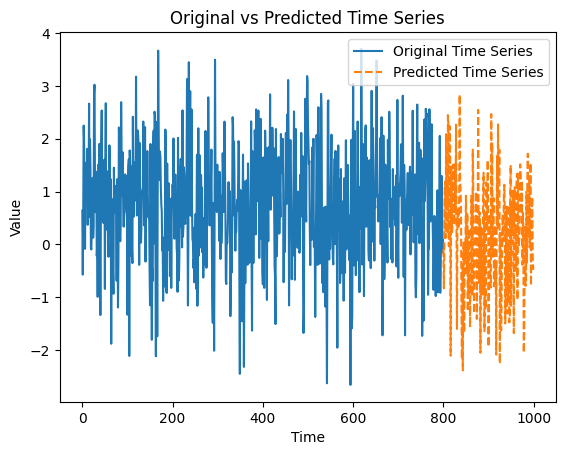

In [12]:
# вариант с добавлением только предсказанного конца
predicted_values = np.zeros(n)
predicted_values[:lag] = generated_data[:lag]

for t in range(lag, n):
    predicted_values[t] = ar_coefficients[0] + np.dot(ar_coefficients, predicted_values[t-lag:t][::-1]) + np.random.normal()

plt.plot(generated_data[:800], label='Original Time Series')
plt.plot(np.arange(800, 1000), predicted_values[800:], label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Анализ работы при различных ядрах и гиперпараметрах модели <br>

Ядро представляет собой функцию, которая измеряет схожесть между парами данных в пространстве признаков

Линейное ядро (Linear kernel) — это самое простое ядро, которое строит гиперплоскость для разделения данных. Оно часто используется в задачах с линейно разделимыми данными. В математическом смысле линейное ядро вычисляет скалярное произведение между векторами признаков объектов.


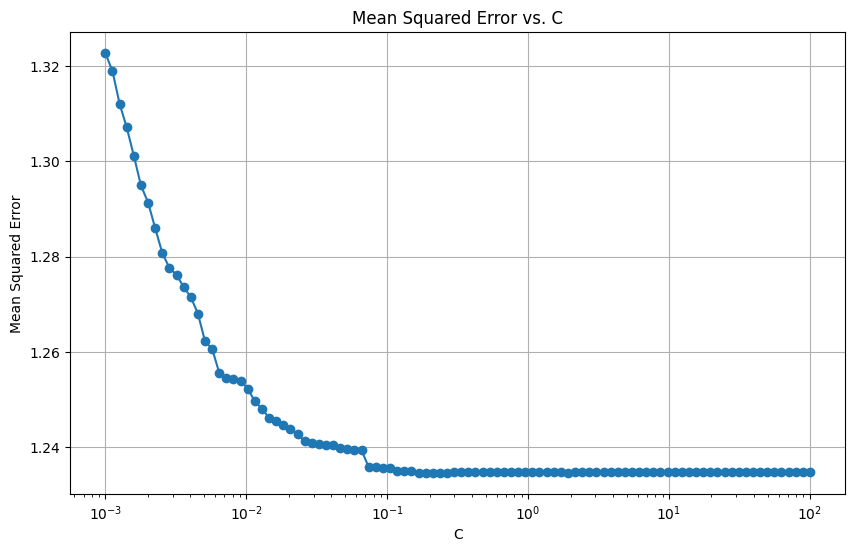

In [13]:
#C (параметр регуляризации)
#контролирует компромисс между подгонкой данных и общей сложностью модели, большие значения C могут привести к более точной подгонке данных, но могут также привести к переобучению
C_values = np.logspace(-3, 2, 100)

mse_values = []

for C in C_values:
    svr_model_linear = SVR(kernel='linear', C=C, gamma='scale')
    svr_model_linear.fit(X_train, y_train)
    y_pred_rbf = svr_model_linear.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rbf)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(C_values, mse_values, marker='o')
plt.xscale('log')
plt.title('Mean Squared Error vs. C')
plt.xlabel('C')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

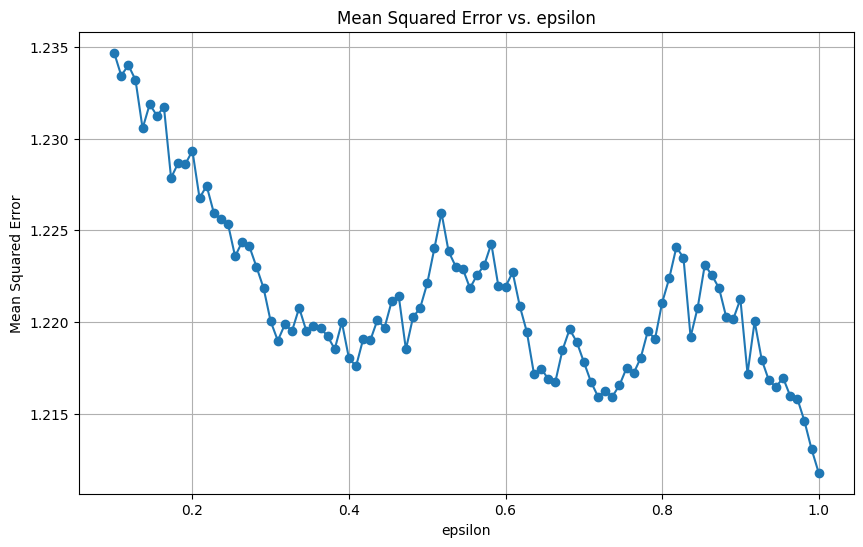

In [14]:
#epsilon (допуск)
#контролирует ширину зазора в модели. Определяет, какие точки будут считаться находящимися внутри зазора
epsilon_values = np.linspace(0.1, 1.0, 100)

mse_values = []

for epsilon_value in epsilon_values:
    svr_model_linear = SVR(kernel='linear', epsilon=epsilon_value)
    svr_model_linear.fit(X_train, y_train)
    y_pred_linear = svr_model_linear.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_linear)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. epsilon')
plt.xlabel('epsilon')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

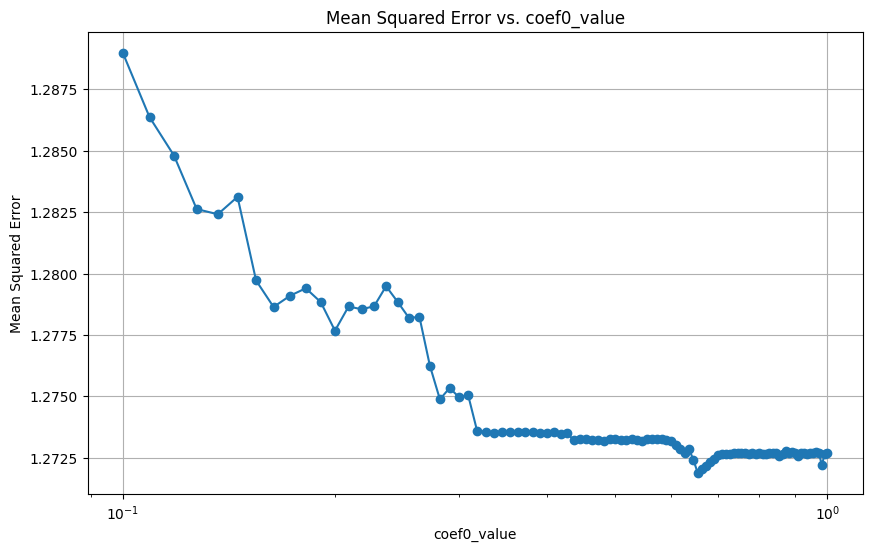

In [15]:
#свободный член
#он влияет на взаимодействие между константой и коэффициентом ряда
coef0_values = np.linspace(0.1, 1.0, 100)

mse_values = []

for coef0_value in coef0_values:
    svr_model_linear = SVR(kernel='poly', C=1.0, coef0=coef0_value)
    svr_model_linear.fit(X_train, y_train)
    y_pred_rbf = svr_model_linear.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rbf)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(coef0_values, mse_values, marker='o')
plt.xscale('log')
plt.title('Mean Squared Error vs. coef0_value')
plt.xlabel('coef0_value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

Ядро Radial Basis Function (RBF) — это наиболее распространенное ядро, которое может разделять данные, не являющиеся линейно разделимыми. Оно создает границу принятия решений в виде радиально-симметричного колокола (нормального распределения)

Mean Squared Error (RBF Kernel): 1.2782209635255322


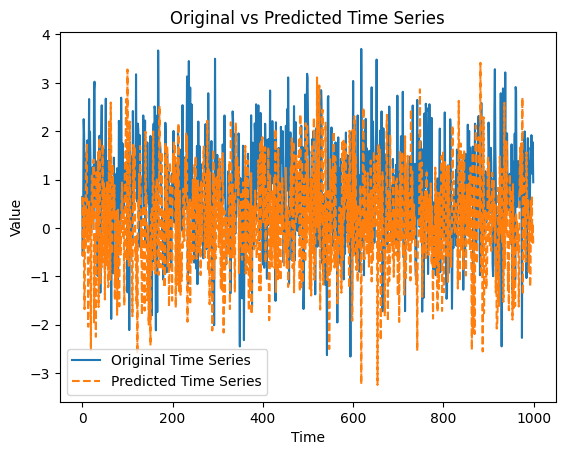

In [16]:
svr_model_rbf = SVR(kernel='rbf', C=1.0, gamma='scale')
svr_model_rbf.fit(X_train, y_train)
y_pred_rbf = svr_model_rbf.predict(X_test)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
print('Mean Squared Error (RBF Kernel):', mse_rbf)

predicted_values = np.zeros(n)
predicted_values[:lag] = generated_data[:lag]

for t in range(lag, n):
    predicted_values[t] = ar_coefficients[0] + np.dot(ar_coefficients, predicted_values[t-lag:t][::-1]) + np.random.normal()

plt.plot(generated_data, label='Original Time Series')
plt.plot(predicted_values, label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

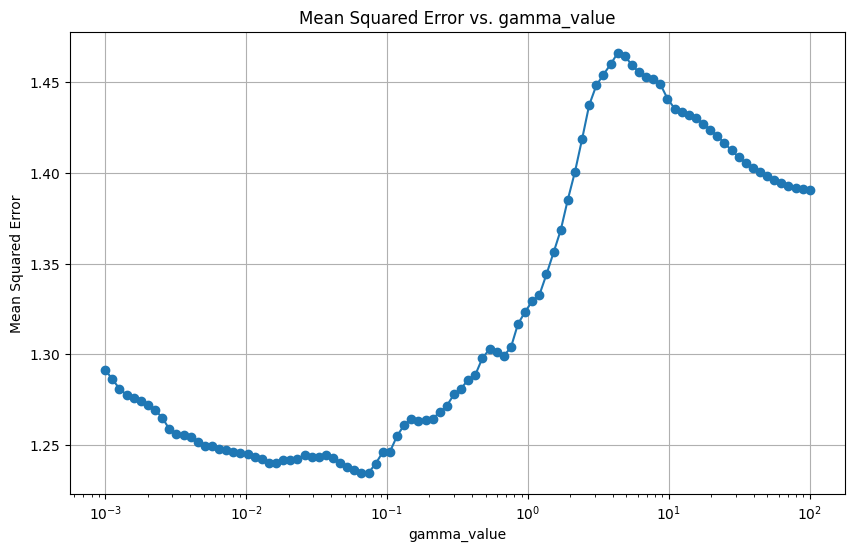

In [17]:
#gamma (коэффициент ядра): Коэффициент, используемый в некоторых ядрах, таких как радиально-базисное.
#Он влияет на форму кривой и контролирует, насколько далеко влияют отдельные обучающие точки.

gamma_values = np.logspace(-3, 2, 100)

mse_values = []

for gamma_value in gamma_values:
    svr_model_rbf = SVR(kernel='rbf', C=1.0, gamma=gamma_value)
    svr_model_rbf.fit(X_train, y_train)
    y_pred_rbf = svr_model_rbf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rbf)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(gamma_values, mse_values, marker='o')
plt.xscale('log')
plt.title('Mean Squared Error vs. gamma_value')
plt.xlabel('gamma_value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

Ядро с полиномиальной функцией (Polynomial kernel) — это ядро, которое вводит полиномиальную функцию в пространство признаков для разделения данных. Это может быть полезно для данных, которые не могут быть разделены гиперплоскостью.

Mean Squared Error (RBF Kernel): 1.3122675600355083


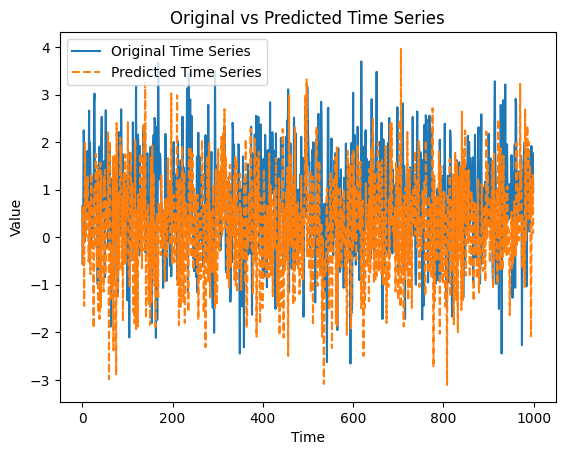

In [18]:
svr_model_poly = SVR(kernel='poly', C=1.0, gamma='scale')
svr_model_poly.fit(X_train, y_train)
y_pred_poly = svr_model_poly.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print('Mean Squared Error (RBF Kernel):', mse_poly)

predicted_values = np.zeros(n)
predicted_values[:lag] = generated_data[:lag]

for t in range(lag, n):
    predicted_values[t] = ar_coefficients[0] + np.dot(ar_coefficients, predicted_values[t-lag:t][::-1]) + np.random.normal()

plt.plot(generated_data, label='Original Time Series')
plt.plot(predicted_values, label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

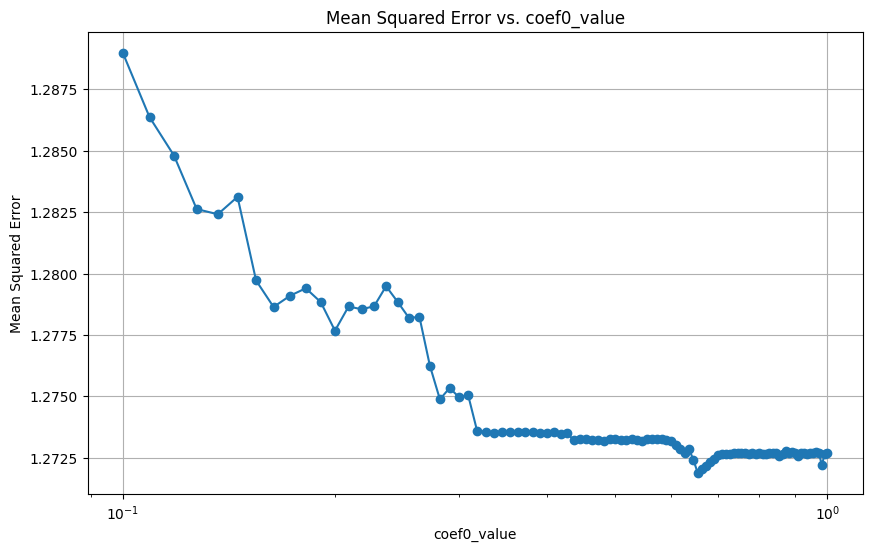

In [19]:
# coef0 (свободный член): Свободный член в функции ядра, который влияет на взаимодействие между константой и коэффициентом ядра.

coef0_values = np.linspace(0.1, 1.0, 100)

mse_values = []

for coef0_value in coef0_values:
    svr_model_poly = SVR(kernel='poly', C=1.0, coef0=coef0_value)
    svr_model_poly.fit(X_train, y_train)
    y_pred_poly = svr_model_poly.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_poly)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(coef0_values, mse_values, marker='o')
plt.xscale('log')
plt.title('Mean Squared Error vs. coef0_value')
plt.xlabel('coef0_value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

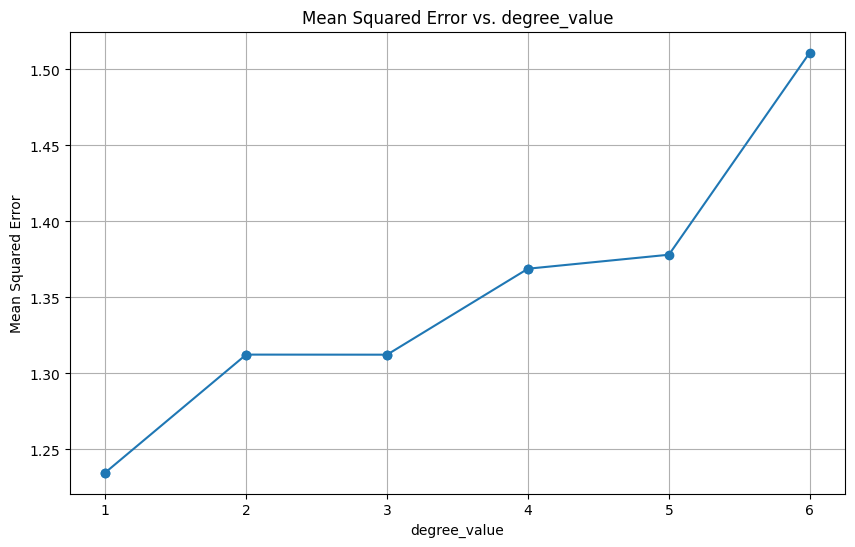

In [20]:
#degree (степень для полиномиального ядра): Применяется только для полиномиального ядра и определяет степень полинома.

degree_values = np.linspace(1, 6, 10, dtype=int)

mse_values = []

for degree_value in degree_values:
    svr_model_poly = SVR(kernel='poly', C=1.0, degree=degree_value)
    svr_model_poly.fit(X_train, y_train)
    y_pred_poly = svr_model_poly.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_poly)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(degree_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. degree_value')
plt.xlabel('degree_value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

Ядро с сигмоидной функцией (Sigmoid kernel) — это ядро, которое используется для моделирования нейронных сетей. Оно может работать с нелинейными данными, имитирует форму сигмоидальная функции

Mean Squared Error (sigmoid Kernel): 998.8917067593072


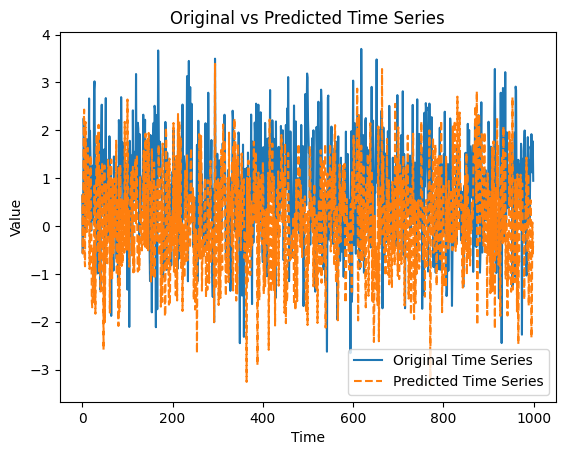

In [21]:
svr_model_sigm = SVR(kernel='sigmoid', C=1.0, gamma='scale')
svr_model_sigm.fit(X_train, y_train)
y_pred_sigm = svr_model_sigm.predict(X_test)
mse_sigm = mean_squared_error(y_test, y_pred_sigm)
print('Mean Squared Error (sigmoid Kernel):', mse_sigm)

predicted_values = np.zeros(n)
predicted_values[:lag] = generated_data[:lag]

for t in range(lag, n):
    predicted_values[t] = ar_coefficients[0] + np.dot(ar_coefficients, predicted_values[t-lag:t][::-1]) + np.random.normal()

plt.plot(generated_data, label='Original Time Series')
plt.plot(predicted_values, label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

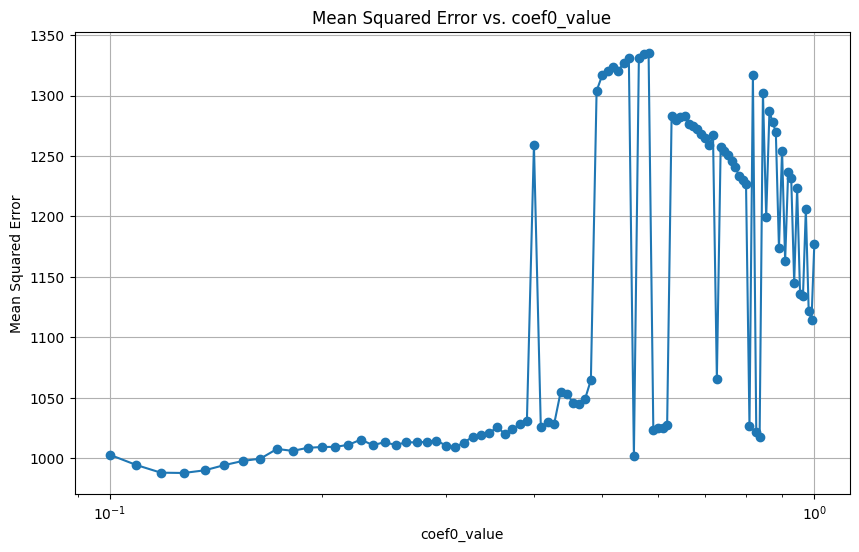

In [22]:
# coef0 (свободный член): Свободный член в функции ядра, который влияет на взаимодействие между константой и коэффициентом ядра.

coef0_values = np.linspace(0.1, 1.0, 100)

mse_values = []

for coef0_value in coef0_values:
    svr_model_sigm = SVR(kernel='sigmoid', C=1.0, coef0=coef0_value)
    svr_model_sigm.fit(X_train, y_train)
    y_pred_sigm = svr_model_sigm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_sigm)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(coef0_values, mse_values, marker='o')
plt.xscale('log')
plt.title('Mean Squared Error vs. coef0_value')
plt.xlabel('coef0_value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()